In [1]:
import pandas as pd

from helpers import swatch

In [2]:
def display_colored(df):
    display(df.style.applymap(lambda c:"background-color: {}".format(c), subset=['rgb']))

In [3]:
display_colored(pd.read_csv('dmc.csv', index_col='number')[150:160])

,name,rgb
number,,
598,Light Turquoise,#90c3cc
600,Very Dark Cranberry,#cd2f63
601,Dark Cranberry,#d1286a
602,Medium Cranberry,#e24874
603,Cranberry,#ffa4be
604,Light Cranberry,#ffb0be
605,Very Light Cranberry,#ffc0cd
606,Bright Orange-Red,#fa3203
608,Bright Orange,#fd5d35


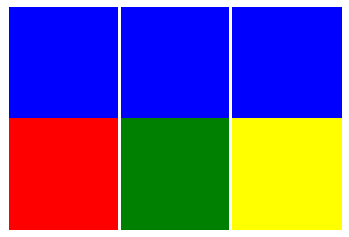

In [4]:
swatch('blue', ['red', 'green', 'yellow'])

## Color differences

In [5]:
dmc = pd.read_csv('dmc.csv', index_col='number')
ariadna = pd.read_csv('ariadna.csv', index_col='number').dropna()

In [6]:
base_numbers = ['321', '518', '553', '701', '3863']

In [7]:
display_colored(dmc.loc[base_numbers])

,name,rgb
number,,
321,Red,#c72b3b
518,Light Wedgwood,#4f93a7
553,Violet,#a3638b
701,Light Green,#3f8f29
3863,Medium Mocha Beige,#a4835c


In [8]:
def find_similar(base_number, metric, n=5):
    base_color = dmc.loc[base_number]['rgb']
    
    ariadna['distance'] = [metric(base_color, color) for color in ariadna['rgb']]
    similar_rows = ariadna.nsmallest(n, 'distance')
    
    display_colored(similar_rows)
    swatch(base_color, similar_rows['rgb'].to_list())

### RGB euclidean

In [9]:
def pair_split(s):
    s = s.lstrip('#')
    return [s[i:i+2] for i in range(0, len(s), 2)]

def to_dec(hex_str):
    return int('0x' + hex_str, 16)

In [10]:
def rgb_euclidean(base, other):
    score = 0
    for x, y in zip(pair_split(base), pair_split(other)):
        score += (to_dec(x) - to_dec(y))**2
        
    return score

,pl,name,rgb,distance
number,,,,
1563,malinowy,raspberry,#c92435,89
1530,morelowy najciemniejszy,apricot the darkest,#c32931,120
1535,miedziany ciemny,copper dark,#c43232,139
1738,ceglasty ciemny,brick red dark,#ce2832,139
1520,mandarynkowy,tangerine,#cd3230,206


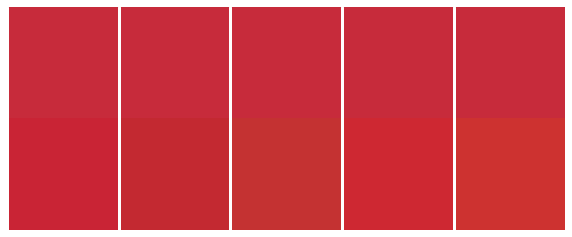

In [11]:
find_similar(base_numbers[0], rgb_euclidean, 5)